# Case Study: Medifor
This notebook looks at the differences between a train and test set, specifically the NC17 (train) and MFC18 (test) datasets.

In [2]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts

from scripts.clustering import feature_clustering
from scripts.misclassification3 import misclassification
data_dir = '../../data'

## Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

### NC17 (Original features)
We first plot the similarity between data points using the original feature space:

model (LGBMClassifier)
train set acc: 0.999669
train log loss: 0.04624
train auroc: 1.000
test set acc: 0.894040
test log loss: 0.27671
test auroc: 0.952
concatenating X_train and X_test...
embedding with tsne...
saving data to output/feature_clustering/NC17_EvalPart1_None...


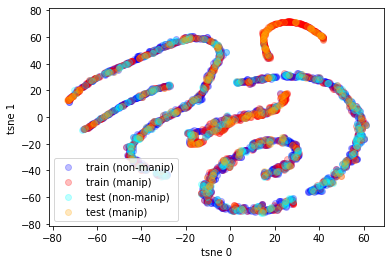

In [3]:
feature_clustering(model='lgb', encoding='None', dataset='NC17_EvalPart1', random_state=1, data_dir=data_dir)

### NC17 (Tree-extracted feature space)
Now we perform the same procedure, except this time with the tree-extracted feature representation:

model (LGBMClassifier)
train set acc: 0.999669
train log loss: 0.04624
train auroc: 1.000
test set acc: 0.894040
test log loss: 0.27671
test auroc: 0.952
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3019, 17)
classes: [0 1]
linear_model: KernelLogisticRegression(C=0.1, pred_size=1000)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
saving data to output/feature_clustering/NC17_EvalPart1_leaf_output...


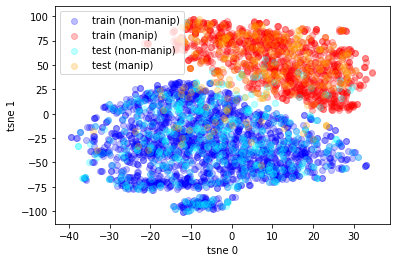

In [6]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='NC17_EvalPart1', true_label=False,
                   linear_model='lr', kernel='linear', random_state=1, data_dir=data_dir, save_results=True)

### NC17 (Train) and MFC18 (Test)
Now we apply the same process to two slightly different datasets: NC17 (train) and MFC18 (test), where we can see there is a clear separation between the positive and negative classes for the training set, but not for the test set:

model (LGBMClassifier)
train set acc: 0.994171
train log loss: 0.06038
train auroc: 1.000
test set acc: 0.754894
test log loss: 0.63588
test auroc: 0.748
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3774, 17)
classes: [0 1]
linear_model: KernelLogisticRegression(C=0.1, pred_size=1000)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...
saving data to output/feature_clustering/nc17_mfc18_leaf_output...


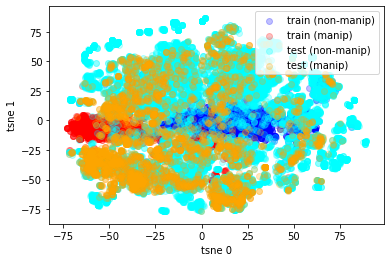

In [7]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='nc17_mfc18', true_label=False,
                   linear_model='lr', kernel='linear', random_state=1, data_dir=data_dir, save_results=True)

## Understanding Misclassified Test Instances
This section generates a sample-based explanation for a misclassified test instance, and then shows
the distributional differences in feature values for the training samples that contribute towards
the predicted label (excitatory) vs the the samples that contribute against the predicted
label (inhibitory):

model (LGBMClassifier)
train set acc: 0.994171
train log loss: 0.06038
train auroc: 1.000
test set acc: 0.754894
test log loss: 0.63588
test auroc: 0.748
Positive contributors, 76.4% of explanation: 3427, 90.8% of training
Negative contributors, 23.6% of explanation: 347, 9.2% of training

test_12658
predicted as 0, actual is 1
	lstmwresampling: val=0.007, shap=-0.479
	tallc: val=0.687, shap=-0.287
	block02: val=37.840, shap=-0.045
	contrast_enhance: val=0.350, shap=-0.042
	gradbased: val=0.000, shap=0.028
train_942 predicted as 1, actual is 1, contribution=-0.003
	lstmwresampling: val=0.036, shap=-0.266
	dct03: val=0.761, shap=0.233
	noise01_baseline_ta1: val=7.581, shap=0.180
	dct01_baseline_ta1: val=0.883, shap=0.106
	p_purduepolimita11c_2_0_mediforsystem: val=0.400, shap=0.047
train_1102 predicted as 1, actual is 1, contribution=-0.003
	contrast_enhance: val=0.826, shap=0.236
	lstmwresampling: val=0.024, shap=-0.229
	noise01_baseline_ta1: val=11.699, shap=0.189
	dct03: val=0.135, s

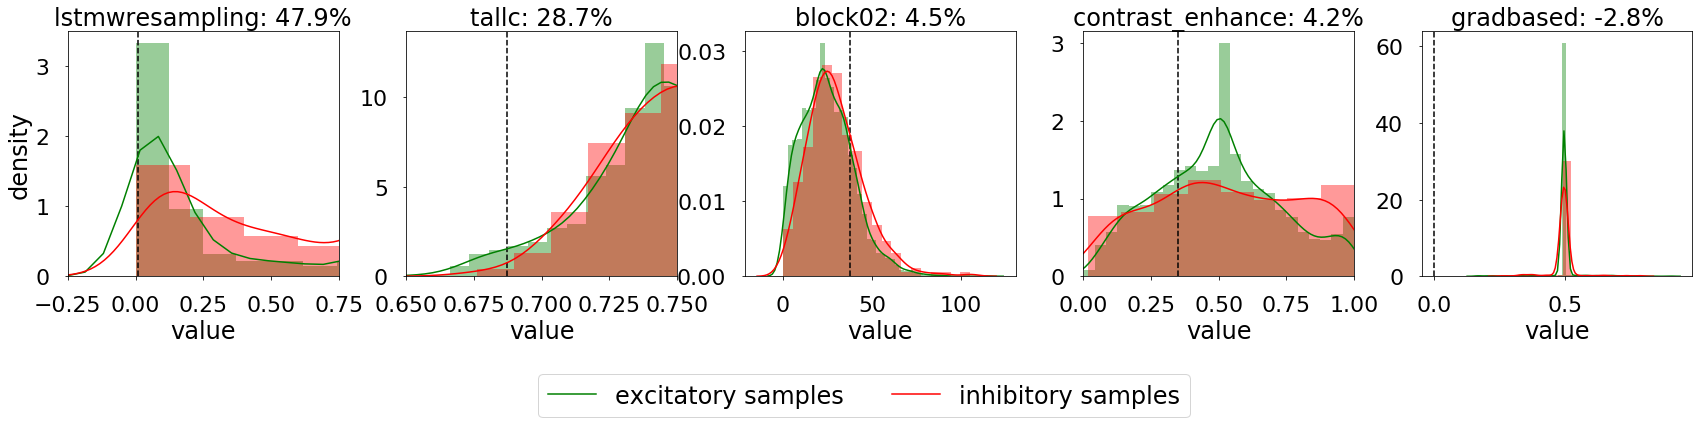

In [3]:
misclassification(model='lgb', dataset='nc17_mfc18', encoding='leaf_output',
                  linear_model='lr', kernel='linear', data_dir=data_dir, topk_test=1, topk_train=4)

model (LGBMClassifier)
train set acc: 0.885494
train log loss: 0.27603
train auroc: 0.959
test set acc: 0.855519
test log loss: 0.34110
test auroc: 0.900
Positive contributors, 71.0% of explanation: 16168, 89.5% of training
Negative contributors, 29.0% of explanation: 1901, 10.5% of training

test_15388
predicted as 0, actual is 1
	holistic_image_v18: val=0.002, shap=-0.573
	rebroadcastcnn: val=1.000, shap=0.098
	cropnet: val=0.019, shap=-0.092
	globalcontrast_vgg: val=1.000, shap=-0.061
	holistic_splice: val=0.006, shap=-0.055
train_3401 predicted as 1, actual is 1, contribution=-0.001
	holistic_image_v18: val=0.237, shap=-0.260
	holistic_image_v19: val=0.003, shap=0.223
	localcontrast_vgg: val=0.325, shap=0.140
	cropnet: val=0.029, shap=0.126
	globalcontrast_vgg: val=1.000, shap=0.089
train_9602 predicted as 1, actual is 1, contribution=-0.001
	holistic_image_v19: val=0.000, shap=-0.349
	rebroadcastcnn: val=1.000, shap=0.197
	localcontrast_vgg: val=0.333, shap=0.154
	holistic_image_v

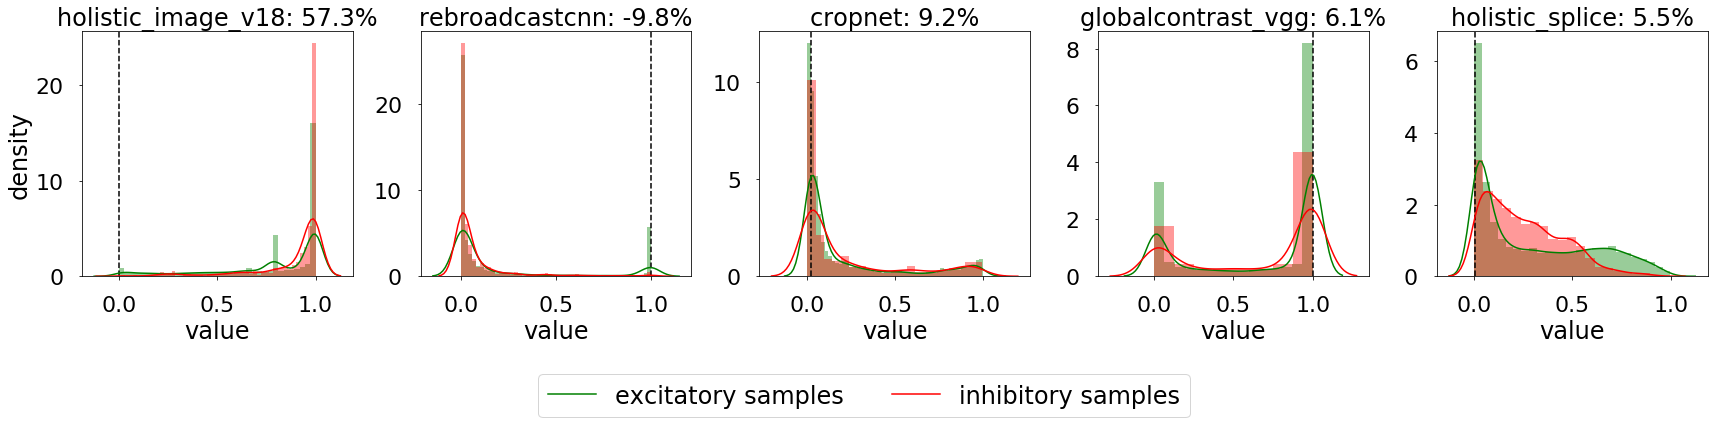

In [8]:
misclassification(model='lgb', dataset='mfc18_mfc19', encoding='leaf_output',
                  linear_model='lr', kernel='linear', data_dir=data_dir, topk_test=1, topk_train=4)